In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/result.csv', parse_dates=['time'], index_col=['time'])
data

,outdoor_temp,zone_temp,occupancy,supply_temp,air_flow
time,,,,,
2017-01-01 00:00:00,2.200,22.832449,0,25.000003,0.733767
2017-01-01 00:05:00,1.825,22.824465,0,25.000003,0.733767
2017-01-01 00:10:00,1.450,22.812760,0,25.000003,0.733767
2017-01-01 00:15:00,1.075,22.799019,0,25.000003,0.733767
2017-01-01 00:20:00,0.700,22.784421,0,25.000003,0.733767
...,...,...,...,...,...
2017-12-31 23:40:00,6.000,22.990503,0,25.000004,0.733767
2017-12-31 23:45:00,6.000,22.988552,0,25.000004,0.733767
2017-12-31 23:50:00,6.000,22.986715,0,25.000004,0.733767


In [2]:
train_data = data.loc['2017-04-07 07:30:00':'2017-04-07 09:30:00']
test_data = data.loc['2017-04-07 09:00:00':'2017-04-07 10:00:00']

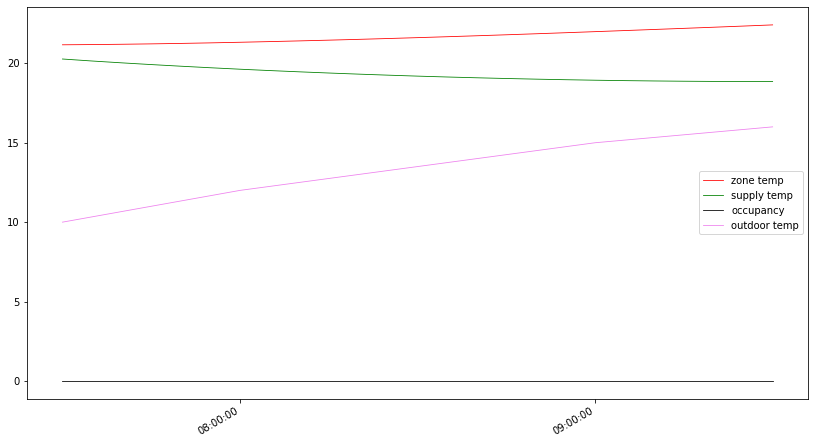

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(train_data.index, train_data['zone_temp'].values, color = 'red', linewidth = 0.8, label = 'zone temp')
ax.plot(train_data.index, train_data['supply_temp'].values, color = 'green', linewidth = 0.8, label = 'supply temp')
ax.plot(train_data.index, train_data['occupancy'].values, color = 'black', linewidth = 0.8, label = 'occupancy')
ax.plot(train_data.index, train_data['outdoor_temp'].values, color = 'violet', linewidth = 0.8, label = 'outdoor temp')
#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.legend()
plt.show()

In [4]:
x = train_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y = train_data[['zone_temp']]

x_test = test_data[['supply_temp', 'air_flow','outdoor_temp','occupancy']]
y_test = test_data[['zone_temp']]
x_test

,supply_temp,air_flow,outdoor_temp,occupancy
time,,,,
2017-04-07 09:00:00,18.937511,0.073377,15.000000,0
2017-04-07 09:05:00,18.911480,0.073377,15.166667,0
2017-04-07 09:10:00,18.890256,0.073377,15.333333,0
2017-04-07 09:15:00,18.873699,0.073377,15.500000,0
2017-04-07 09:20:00,18.861843,0.073377,15.666667,0
2017-04-07 09:25:00,18.854609,0.073377,15.833333,0
2017-04-07 09:30:00,18.851951,0.073377,16.000000,0
2017-04-07 09:35:00,18.865005,0.073377,16.166667,0
2017-04-07 09:40:00,18.883712,0.073377,16.333333,0


In [5]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
regressor = SVR()
model = regressor.fit(x, y)
print(model.score(x,y))
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print('y_test: ',y_test.zone_temp.values)
print('y_pred: ',y_pred)
print(mse)

0.8575515384100174
0.4402467303309951
y_test:  [21.99529052 22.06383244 22.1329653  22.20279264 22.27360372 22.34606917
 22.42113874 22.4985038  22.57781951 22.65895218 22.74185101 22.82924107
 22.91831567]
y_pred:  [21.90494756 21.92934803 21.9534899  21.97736526 22.00096156 22.02426976
 22.04728001 22.06966664 22.0917057  22.11340338 22.13475486 22.15505851
 22.17550459]
0.1938171835671319


/Users/devanshukumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:
upper_bound = []
lower_bound = []
upper_bound = y_pred + mse
lower_bound = y_pred - mse
bounds = y_test
bounds['upper'] = upper_bound
bounds['lower'] = lower_bound
bounds['pred'] = y_pred
bounds

<ipython-input-6-ec974e816ff8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bounds['upper'] = upper_bound
<ipython-input-6-ec974e816ff8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bounds['lower'] = lower_bound
<ipython-input-6-ec974e816ff8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,zone_temp,upper,lower,pred
time,,,,
2017-04-07 09:00:00,21.995291,22.098765,21.711130,21.904948
2017-04-07 09:05:00,22.063832,22.123165,21.735531,21.929348
2017-04-07 09:10:00,22.132965,22.147307,21.759673,21.953490
2017-04-07 09:15:00,22.202793,22.171182,21.783548,21.977365
2017-04-07 09:20:00,22.273604,22.194779,21.807144,22.000962
2017-04-07 09:25:00,22.346069,22.218087,21.830453,22.024270
2017-04-07 09:30:00,22.421139,22.241097,21.853463,22.047280
2017-04-07 09:35:00,22.498504,22.263484,21.875849,22.069667
2017-04-07 09:40:00,22.577820,22.285523,21.897889,22.091706


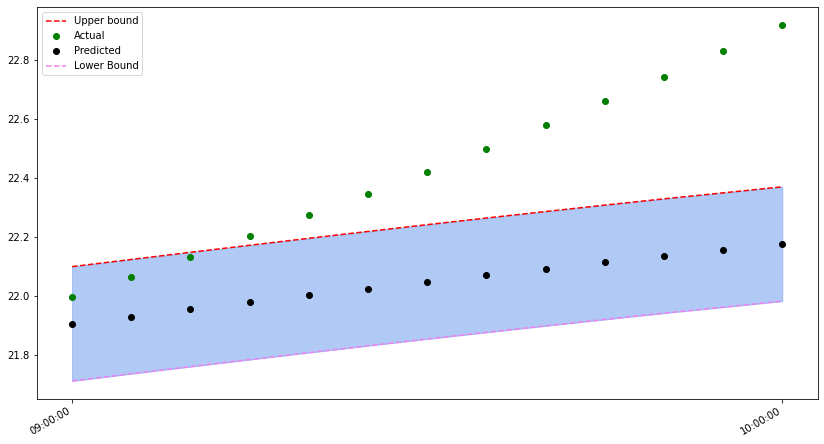

In [7]:
fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(bounds.index, bounds['upper'].values, '--', color = 'red', label = 'Upper bound')
ax.plot(bounds.index, bounds['zone_temp'].values, 'o', color = 'green', label = 'Actual')
ax.plot(bounds.index, bounds['pred'].values, 'o', color = 'black', label = 'Predicted')
ax.plot(bounds.index, bounds['lower'].values, '--', color = 'violet', label = 'Lower Bound')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.fill_between(bounds.index, bounds['upper'].values,bounds['lower'].values,color='cornflowerblue',alpha=.5)
plt.legend()
plt.show()